# Análisis de las observaciones de NuSTAR
---

- ObsID: 30901002002
- Fondo sin straylight
- FPM A

## Se importan las librerías necesarias

In [1]:
import xspec as xs
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

## Carga de los datos

In [2]:
data = "src_bck_A_sr.pha"

In [3]:
s = xs.Spectrum(data)


1 spectrum  in use
 
Spectral Data File: src_bck_A_sr.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  7.410e-01 +/- 3.407e-03 (96.0 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-4096
  Telescope: NuSTAR Instrument: FPMA  Channel Type: PI
  Exposure Time: 6.699e+04 sec
 Using fit statistic: chi
 Using Background File                src_bck_A_bk.pha
  Background Exposure Time: 6.699e+04 sec
 Using Response (RMF) File            src_bck_A_sr.rmf for Source 1
 Using Auxiliary Response (ARF) File  src_bck_A_sr.arf



## Seteo de las gráficas

In [7]:
xs.Plot.device = "/null"
xs.Plot.xAxis="keV"
xs.Plot("data")
xs.Plot.setRebin(10,100)
s.ignore("**-3. 79.-**")
energies = xs.Plot.x()
edeltas = xs.Plot.xErr()
rates = xs.Plot.y()
errors = xs.Plot.yErr()
labels = xs.Plot.labels()

***Warning: Fit is not current.
    35 channels (1-35) ignored in spectrum #     1
  2162 channels (1935-4096) ignored in spectrum #     1

Fit statistic  : Chi-Squared              4.449774e+11     using 1899 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number: 1

Test statistic : Chi-Squared              4.449774e+11     using 1899 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 

 Null hypothesis probability of 0.000000e+00 with 1889 degrees of freedom
 Current data and model not fit yet.



## Gráfica del "espectro"

<ErrorbarContainer object of 3 artists>

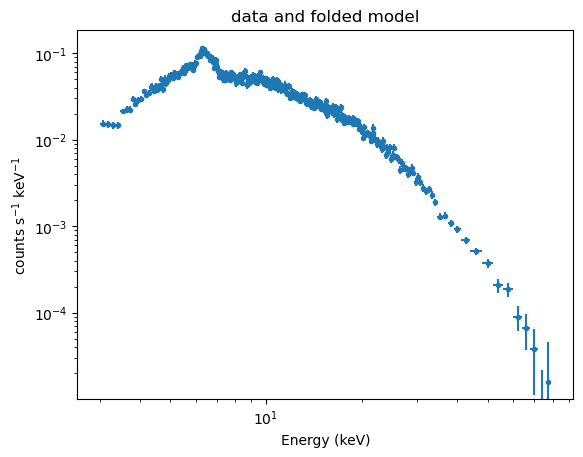

In [8]:
plt.xscale('log')
plt.yscale('log')
plt.xlabel(labels[0])
plt.ylabel(labels[1])
plt.title(labels[2])
plt.errorbar(energies,rates,xerr=edeltas,yerr=errors,fmt='.')

In [6]:
m = xs.Model("phabs*(gauss + po + bremss + bb)")


Model phabs<1>(gaussian<2> + powerlaw<3> + bremss<4> + bbody<5>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   phabs      nH         10^22    1.00000      +/-  0.0          
   2    2   gaussian   LineE      keV      6.50000      +/-  0.0          
   3    2   gaussian   Sigma      keV      0.100000     +/-  0.0          
   4    2   gaussian   norm                1.00000      +/-  0.0          
   5    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   6    3   powerlaw   norm                1.00000      +/-  0.0          
   7    4   bremss     kT         keV      7.00000      +/-  0.0          
   8    4   bremss     norm                1.00000      +/-  0.0          
   9    5   bbody      kT         keV      3.00000      +/-  0.0          
  10    5   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Sq

In [9]:
xs.Fit.perform()

                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH       2:LineE       3:Sigma        4:norm    5:PhoIndex        6:norm          7:kT        8:norm          9:kT       10:norm
7905.09      1.21178e+06  -1       3.79635       6.47274      0.193978   0.000186738       1.18507   0.000359409       88.2774   0.000833533       4.49610   0.000370746
5336.16      1.43517e+06   0       4.20588       6.44755      0.243153   0.000182806       1.19843   0.000391150       28.3482    0.00108149       4.46176   0.000455981
3764.18      686808       -1       5.31595       6.39653      0.325836   0.000205529       1.53486   0.000313505       57.3397    0.00196603       5.32643   0.000664850
3334.13      114110       -1       7.74270       6.37086      0.359497   0.000219555       1.90231   0.000226736       22.6787    0.00208851       5.73871   0.000820317
3077.06      112884       -1       7.34123       6.35372      0.397382   0.000238452       3.50880   0.000270

In [10]:
xs.Plot("data resid")
energies = xs.Plot.x()
edeltas = xs.Plot.xErr()
rates = xs.Plot.y(1,1)
errors = xs.Plot.yErr(1,1)
foldedmodel = xs.Plot.model()
dataLabels = xs.Plot.labels(1)
residLabels = xs.Plot.labels(2)
# note that for matplotlib step plots we need an x-axis array which includes the start and end value for each
# bin and the y-axis has to be the same size with an extra value added equal to the value of the last bin
nE = len(energies)
stepenergies = list()
for i in range(nE):
    stepenergies.append(energies[i] - edeltas[i])
stepenergies.append(energies[-1]+edeltas[-1])
foldedmodel.append(foldedmodel[-1])
resid = xs.Plot.y(1,2)
residerr = xs.Plot.yErr(1,2)

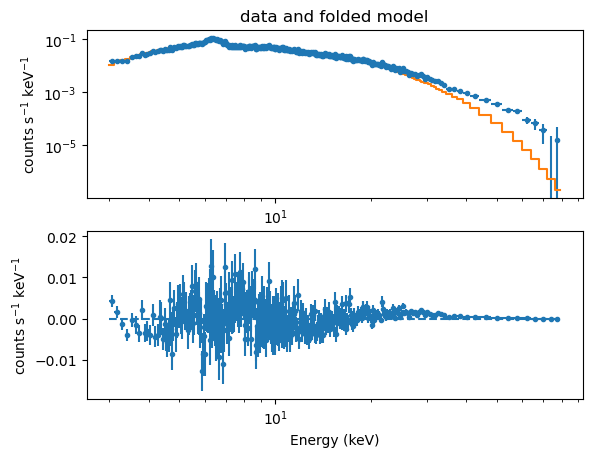

In [11]:
plt.subplot(211)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(dataLabels[1])
plt.title(dataLabels[2])
plt.errorbar(energies,rates,xerr=edeltas,yerr=errors,fmt='.')
plt.step(stepenergies,foldedmodel,where='post')
plt.subplot(212)
plt.xscale('log')
plt.xlabel(residLabels[0])
plt.ylabel(residLabels[1])
plt.errorbar(energies,resid,xerr=edeltas,yerr=residerr,fmt='.')
plt.hlines(0.0,stepenergies[0],stepenergies[-1],linestyles='dashed')